# Изучаем реальное распределение

*Для выполнения этого задания вам потребуются:*

- *одна из библиотек для визуализации данных (в данном курсе изучаются <a href="https://stepik.org/lesson/196432/step/1?unit=172894">matplotlib</a>, <a href="https://stepik.org/lesson/313078/">seaborn</a>, <a href="https://stepik.org/lesson/360195/">plotly</a>)*

- *знания по работе с внешними ресурсами (API), например, с помощью библиотеки <a href="https://stepik.org/lesson/254899/">Requests</a>*

Генератор https://math-praktikum-stepik.herokuapp.com/api/assignment/a368500_10/ при каждом обращении возвращает число из некоего распределения.

Соберите экспериментальную выборку (*чем больше данных в выборке, тем точнее ваши результаты, при недостаточном объёме какие-то эффекты даже могут не проявиться, но на сбор большой выборки потребуется много времени, т.к. генератор отдаётся только 1 число за раз*)

Постройте <a href="https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0">гистограмму</a> получившегося распределения.

Отметьте на гистограмме:

- Выборочное среднее

- Интервалы в 1 и 2 стандартных отклонения

*Отметки можно поставить засечками или любым иным удобным вам и по возможности наглядным способом*

In [1]:
#Подключаем Библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import statistics

#Вывод в нотбук, для лучшей отладки
%matplotlib inline

In [2]:
# При решении использовались следующие версии:
import sys
import matplotlib
print(f'python: {sys.version}',
      f'numpy: {np.__version__}',
      f'matplotlib: {matplotlib.__version__}',
      f'pandas: {pd.__version__}',
      f'requests: {requests.__version__}', sep='\n')

python: 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
numpy: 1.19.2
matplotlib: 3.3.4
pandas: 1.2.1
requests: 2.25.1


In [3]:
# Собираем данные, через request
def Data_Mining():
    url = 'https://math-praktikum-stepik.herokuapp.com/api/assignment/a368500_10/'
    with open('data.txt', 'a') as file:
        for i in range(10000):
            r = requests.get(url)
            if r.status_code == 200:
                file.write(r.text+'\n')
            print(i)

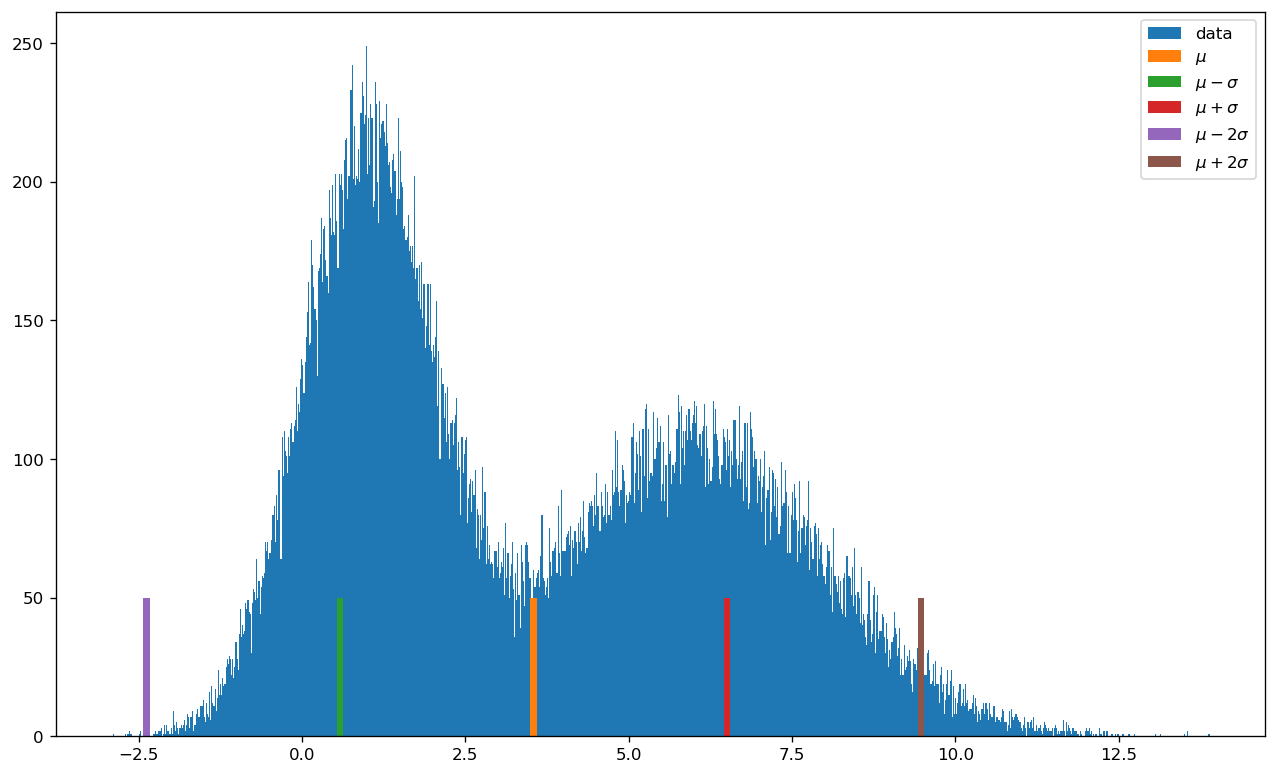

In [4]:
# Считываем данные из файла в переменную
PATH = "data.txt"
with open(PATH, 'r') as file:
    data = np.array(file.read().strip().split('\n')).astype('float64')

# Строим Гистограмму
fig, axes = plt.subplots(figsize = (13, 8), dpi = 120)
axes.hist(data, bins = 1000, label = 'data')
mean = data.mean()
axes.hist([mean for _ in range(50)], label = r'$\mu$')
std = np.std(data, ddof = 1)
axes.hist([mean - std for _ in range(50)], label = r"$\mu - \sigma$")
axes.hist([mean + std for _ in range(50)], label = r"$\mu + \sigma$")
axes.hist([mean - 2*std for _ in range(50)], label = r"$\mu - 2\sigma$")
axes.hist([mean + 2*std for _ in range(50)], label = r"$\mu + 2\sigma$")
axes.legend()
plt.show()

## Вывод:

Распределение имеет две моды, распределение - бимодальное. 